In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random
from datetime import datetime, timedelta
import math
import pandas as pd
import seaborn as sns

1.1 Epidemic on a known graph

In [2]:
n_nodes = 500
k=4

G = nx.circulant_graph(n_nodes, [1, 2])


In [3]:
beta = 0.3
rho = 0.7
N = 100
weeks = 15

In [4]:
def simulEpidemics(G):
    n_inf = []
    inf = []
    rec = []
    susc = []

    for i in range(N):
        init_inf = np.random.choice(G.nodes, size = 10, replace = False)
        inf_iter = set(init_inf)
        rec_iter = set()
        susc_iter = set(range(n_nodes)) - set(inf_iter) - set(rec_iter)

        for j in range(weeks):
            new_inf = []
            new_rec = []
            for el in susc_iter:
                m = len(list(set(inf_iter).intersection(G.neighbors(el))))
                p_inf = 1 - (1 - beta)**m
                v=(np.random.choice(2, p=[p_inf, 1 - p_inf]))
                if v==0:
                    new_inf.append(el)
            for el in inf_iter:
                p_rec = rho
                if np.random.rand() < p_rec:
                    new_rec.append(el)
            
            inf_iter = inf_iter.union(set(new_inf)) - set(new_rec)
            rec_iter = rec_iter.union(set(new_rec))
            susc_iter = set(susc_iter)-set(new_rec) - set(new_rec)

            n_inf.append(len(new_inf))
            inf.append(len(inf_iter))
            rec.append(len(rec_iter))
            susc.append(len(susc_iter))

            

            
      
    
    return n_inf, inf, rec, susc

In [5]:
n_inf, inf, rec, susc = simulEpidemics(G)

In [6]:
avg_new_inf = np.mean(np.reshape(n_inf, (100,15)), axis = 0)
avg_inf = np.mean(np.reshape(inf, (100,15)), axis = 0)
avg_rec = np.mean(np.reshape(rec, (100,15)), axis = 0)
avg_susc = np.mean(np.reshape(susc, (100,15)), axis = 0)

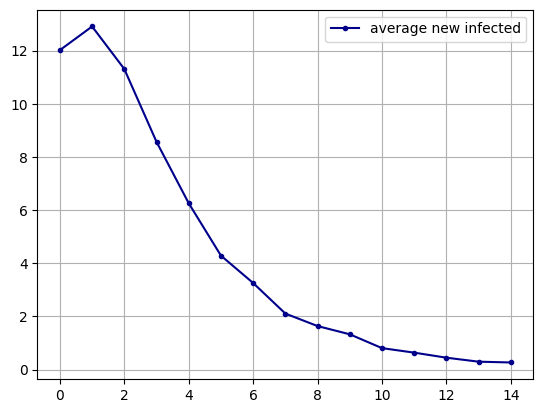

In [7]:
plt.plot(range(15),avg_new_inf, linestyle='solid', marker='.', color='darkblue', label ='average new infected')
plt.legend()
plt.grid(True)
plt.savefig("ex1_1.svg")
plt.show()


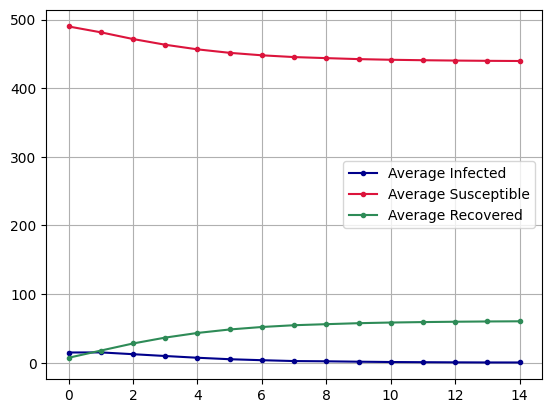

In [8]:
plt.plot(range(15),avg_inf, linestyle='solid', marker='.', color='darkblue', label ='Average Infected')
plt.plot(range(15),avg_susc, linestyle='solid', marker='.', color='crimson', label ='Average Susceptible')
plt.plot(range(15),avg_rec, linestyle='solid', marker='.', color='seagreen', label ='Average Recovered')
plt.legend()
plt.grid(True)
plt.savefig("ex1_1_2.svg")
plt.show()


1.1.2 Generate a random graph

In [9]:
def generateRandomGraph(n_nodes=900,k=4):
    H = nx.complete_graph(k + 1)
    c = np.full((n_nodes), int(k/2), dtype=int) 

    if k % 2  != 0:
        c[::2] += 1
    
    for i in range(k+1,n_nodes):
        weights = np.empty(i,dtype=int)
        

        for node in H.nodes:
            weights[node] = H.degree(node)
        weights_sum = np.sum(weights)
        
        p = weights/weights_sum
        
        neighbors = np.random.choice(H.nodes, size=c[i], replace=False, p=p)
        
        for node in neighbors:
            H.add_edge(i, node)
    return H

In [10]:
H=generateRandomGraph(k=4)

deg = 0
for node in H.nodes:
    deg += H.degree(node)
print("Average degree:", deg/len(H.nodes))

Average degree: 4.0


1.2 Simulate a pandemic without vaccination

In [11]:
n_nodes = 500
k=6
RG = generateRandomGraph(n_nodes,k)
deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))

Average degree: 6.0


In [12]:
n_inf, inf, rec, susc = simulEpidemics(RG)

In [13]:
avg_new_inf = np.mean(np.reshape(n_inf, (100,15)), axis = 0)
avg_inf = np.mean(np.reshape(inf, (100,15)), axis = 0)
avg_rec = np.mean(np.reshape(rec, (100,15)), axis = 0)
avg_susc = np.mean(np.reshape(susc, (100,15)), axis = 0)

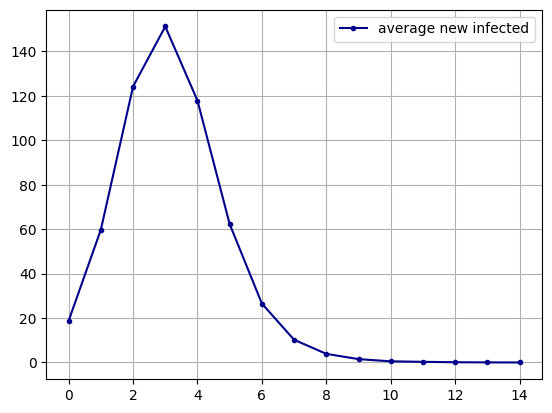

In [14]:
plt.plot(range(15),avg_new_inf, linestyle='solid', marker='.', color='darkblue', label ='average new infected')
plt.legend()
plt.grid(True)
plt.savefig("ex1_2.svg")
plt.show()


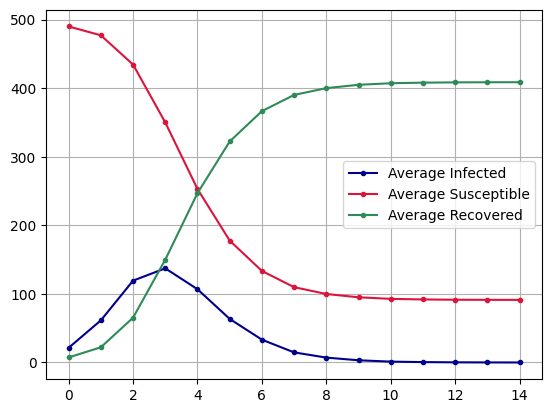

In [15]:
plt.plot(range(15),avg_inf, linestyle='solid', marker='.', color='darkblue', label ='Average Infected')
plt.plot(range(15),avg_susc, linestyle='solid', marker='.', color='crimson', label ='Average Susceptible')
plt.plot(range(15),avg_rec, linestyle='solid', marker='.', color='seagreen', label ='Average Recovered')
plt.legend()
plt.grid(True)
plt.savefig("ex1_2_2.svg")
plt.show()


1.3 Simulate a pandemic with vaccination

In [16]:
k=6
n_nodes = 500
RG2 = generateRandomGraph(n_nodes,k)

beta = 0.3
rho = 0.7
weeks = 15

In [17]:


def simulEpidemicsWithVacc(G):
    n_inf = []
    n_vac = []
    inf= []
    rec = []
    susc = []
    vac = []
    to_vac = [0, 5, 10, 10, 10, 10, 10, 5, 0, 0, 0, 0, 0, 0, 0]

    for i in range(N):
        init_inf = np.random.choice(G.nodes, size = 10, replace = False)
        inf_iter = set(init_inf)
        rec_iter = set()
        susc_iter = set(range(n_nodes)) - set(inf_iter) - set(rec_iter)
        vaccinable = set(range(n_nodes))
        vac_iter = set()

        for j in range(weeks):
            new_inf = []
            new_rec = []

            v = int(n_nodes * to_vac[j]/100) 
            v = min(v, len(vaccinable))
            new_vac =  np.random.choice(list(vaccinable),size = v, replace = False)
            susc_iter = set(susc_iter)-set(new_vac)
            vac_iter = set(vac_iter).union(set(new_vac))



            for el in susc_iter:
                m = len(list(set(inf_iter).intersection(G.neighbors(el))))
                p_inf = 1 - (1 - beta)**m
                ran=(np.random.choice(2, p=[p_inf, 1 - p_inf]))
                if ran==0:
                    new_inf.append(el)
            for el in inf_iter:
                p_rec = rho
                if np.random.rand() < p_rec:
                    new_rec.append(el)
            
            inf_iter = inf_iter.union(set(new_inf)) - set(new_rec)
            rec_iter = rec_iter.union(set(new_rec))
            sucs_iter = set(susc_iter)-set(new_rec) - set(new_rec)
            vaccinable = set(vaccinable) - set(new_rec) - set(new_vac)
            
            n_inf.append(len(new_inf))
            inf.append(len(inf_iter))
            rec.append(len(rec_iter))
            susc.append(len(susc_iter))
            vac.append(len(vac_iter))
            n_vac.append(len(new_vac))

            

            
      
    
    return n_inf, inf, rec, susc, vac, n_vac

In [18]:
k=6
n_nodes = 500
RG2 = generateRandomGraph(n_nodes,k)

In [19]:
n_inf, inf, rec, susc, vac, n_vac = simulEpidemicsWithVacc(RG2)

In [20]:
avg_new_inf = np.mean(np.reshape(n_inf, (100,15)), axis = 0)
avg_inf = np.mean(np.reshape(inf, (100,15)), axis = 0)
avg_recd = np.mean(np.reshape(rec, (100,15)), axis = 0)
avg_susc = np.mean(np.reshape(susc, (100,15)), axis = 0)
avg_vac = np.mean(np.reshape(vac, (100,15)), axis = 0)
avg_new_vac = np.mean(np.reshape(n_vac, (100,15)), axis = 0)
    

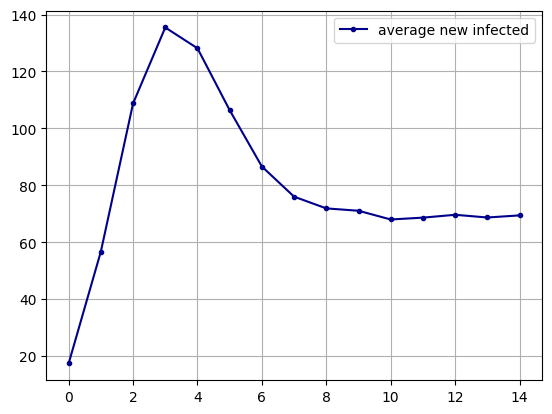

In [21]:
plt.plot(range(15),avg_new_inf, linestyle='solid', marker='.', color='darkblue', label ='average new infected')
plt.legend()
plt.grid(True)
plt.savefig("ex1_3.svg")
plt.show()


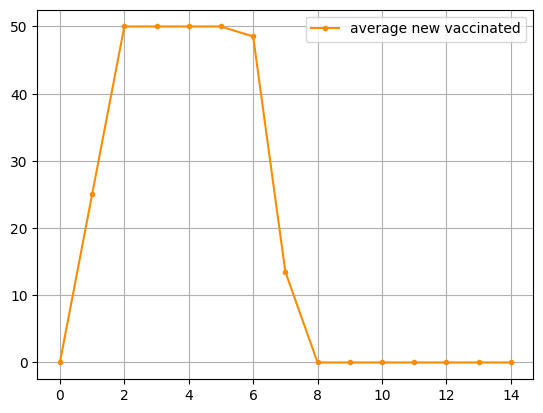

In [22]:
plt.plot(range(15),avg_new_vac, linestyle='solid', marker='.', color='darkorange', label ='average new vaccinated')
plt.legend()
plt.grid(True)
plt.savefig("ex1_3_2.svg")
plt.show()


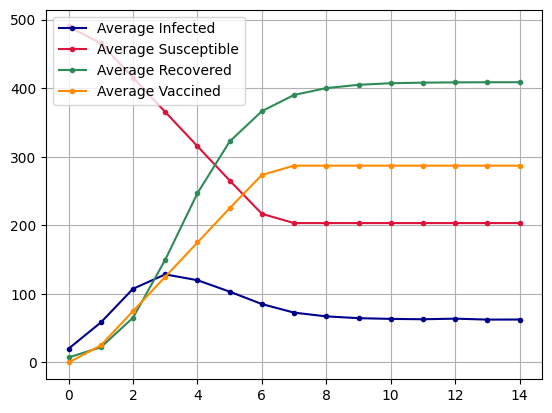

In [23]:
plt.plot(range(15),avg_inf, linestyle='solid', marker='.', color='darkblue', label ='Average Infected')
plt.plot(range(15),avg_susc, linestyle='solid', marker='.', color='crimson', label ='Average Susceptible')
plt.plot(range(15),avg_rec, linestyle='solid', marker='.', color='seagreen', label ='Average Recovered')
plt.plot(range(15),avg_vac, linestyle='solid', marker='.', color='darkorange', label ='Average Vaccined')

plt.legend()
plt.grid(True)
plt.savefig("ex1_3_3.svg")
plt.show()


1.4 The H1N1 pandemic in Sweden

In [24]:
RG3 = generateRandomGraph(k, n_nodes)

In [25]:
def executionFunction(k,beta,rho, n_nodes, iters=10, plot = False):
    real_n_inf = [1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

    RG3 = generateRandomGraph(k, n_nodes)
    
    weeks = 15
    
    
    n_inf = []
    n_vac = []
    inf= []
    rec = []
    susc = []
    vac = []
    to_vac = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]
  
    for j in range(iters):
        init_inf = np.random.choice(RG3.nodes, size = 1, replace = False)
        inf_iter = set(init_inf)
        rec_iter = set()
        susc_iter =  set(RG3.nodes) - set(inf_iter) - set(rec_iter) 
        vaccinable = set(RG3.nodes)
        vac_iter = set()
        
        for i in range(15): 
            new_inf = []
            new_rec = []

            v = int(n_nodes * to_vac[i]/100) 
             
            v = min(v, len(vaccinable) )

             
            new_vac =  np.random.choice(list(vaccinable), size = v, replace = False) 
            

            
            susc_iter = set(susc_iter) - set(new_vac) 
            inf_iter = set(inf_iter) - set(new_vac)
            vac_iter = set(vac_iter).union(set(new_vac))


            for el in susc_iter:
                m = len(list(set(inf_iter).intersection(RG3.neighbors(el))))
                p_inf = 1 - (1 - beta)**m
                ran=(np.random.choice(2, p=[p_inf, 1 - p_inf]))
                if ran==0:
                    new_inf.append(el)
            for el in inf_iter:
                p_rec = rho
                if np.random.rand() < p_rec:
                    new_rec.append(el)

            
            inf_iter = inf_iter.union(set(new_inf)) - set(new_rec)
            rec_iter = rec_iter.union(set(new_rec))
            susc_iter = set(susc_iter)-set(new_rec) - set(new_rec)
            vaccinable = set(vaccinable) - set(new_rec) - set(new_vac)
                    



            n_inf.append(len(new_inf))

            inf.append(len(inf_iter))
            rec.append(len(rec_iter))
            susc.append(len(susc_iter))
            vac.append(len(vac_iter))
            n_vac.append(len(new_vac))

             
    
    
    
    avg_new_inf = np.mean(np.reshape(n_inf, (iters,15)), axis = 0)
    rms  = np.sqrt(1/15* np.sum((avg_new_inf - real_n_inf)**2))
    if plot == False:
        return rms
    else:
        return (rms,n_inf,inf,rec,susc,vac)

In [26]:
n_nodes = 934
iters = 10


k_0 = 10
beta_0 = .3
rho_0 = .6
delta_k_0 = 1
delta_beta_0 = .1
delta_rho_0 = .1

flag = True

while flag:
    rms = []
    ks = [k_0, k_0 + delta_k_0, k_0 - delta_k_0]
    betas = [beta_0, beta_0 + delta_beta_0, beta_0 - delta_beta_0]
    rhos = [rho_0, rho_0 + delta_rho_0, rho_0 - delta_rho_0]
    for k in ks:
      for beta in betas:
        for rho in rhos:
          loss = executionFunction(k, beta, rho, n_nodes, iters, plot=False)
          rms.append([k, beta, rho, loss])

    rms.sort( key = lambda x: x[3])
    bestK, bestBeta, bestRho, bestRMS = rms[0]
    if(bestK == k_0 and bestBeta == beta_0 and bestRho == rho_0):
        print('FINISH')
        flag = False
    else:
        if(bestK != k_0):
            k_0 = bestK
            delta_k_0 = int(delta_k_0 /2)
        if(bestBeta != beta_0):
            print('Update beta_0')
            beta_0 = bestBeta
            delta_beta_0 /=2
        if(bestRho == rho_0):
            print('Update rho_0')
            ro_0 = bestRho
            delta_rho_0 /= 2
print(bestK, bestBeta, bestRho, bestRMS)

Update beta_0
Update beta_0
Update rho_0
Update beta_0
Update beta_0
Update beta_0
Update beta_0
Update rho_0
Update beta_0
Update rho_0
Update beta_0
Update beta_0
Update beta_0
FINISH
11 0.3146484375 0.6 198.48229308093622


In [27]:
n_nodes = 934
iters = 10

rms,n_inf,inf,rec,susc,vac = executionFunction(bestK, bestBeta,bestRho, n_nodes, iters, plot = True)
print('rms',rms)

rms 284.1462968261244


In [28]:
avg_inf = np.mean(np.reshape(inf, (iters,15)), axis = 0)
avg_rec = np.mean(np.reshape(rec, (iters,15)), axis = 0)
avg_susc = np.mean(np.reshape(susc, (iters,15)), axis = 0)
avg_vac = np.mean(np.reshape(vac, (iters,15)), axis = 0)

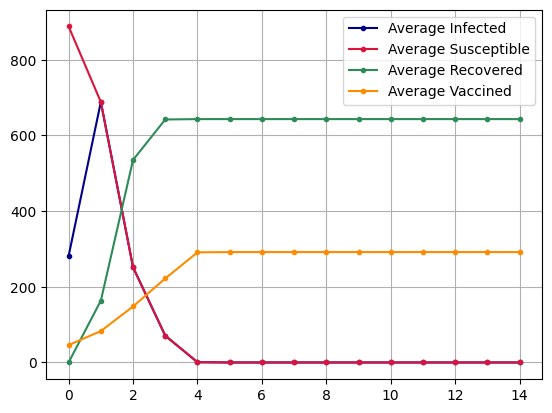

In [29]:

plt.plot(range(15),avg_inf, linestyle='solid', marker='.', color='darkblue', label ='Average Infected')
plt.plot(range(15),avg_susc, linestyle='solid', marker='.', color='crimson', label ='Average Susceptible')
plt.plot(range(15),avg_rec, linestyle='solid', marker='.', color='seagreen', label ='Average Recovered')
plt.plot(range(15),avg_vac, linestyle='solid', marker='.', color='darkorange', label ='Average Vaccined')

plt.legend()
plt.grid(True)
plt.savefig("ex1_4.svg")
plt.show()


2 - COLORING

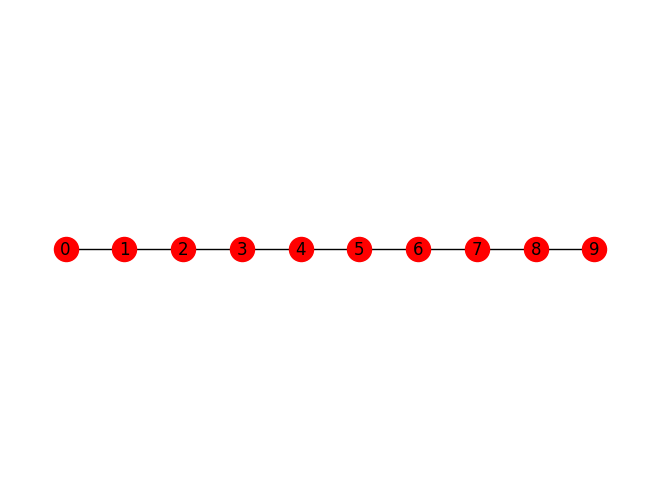

In [30]:
GC = nx.Graph()

for i in range(10):
    GC.add_node(i)

for i in range(9):
    GC.add_edge(i, i+1)

pos = {0: [0,0], 1: [1,0], 2: [2,0], 3: [3,0], 4: [4,0], 5: [5,0], 6: [6,0], 7: [7,0], 8: [8,0], 9: [9,0] }    
nx.draw(GC,pos, with_labels=True, node_color='r')  
plt.savefig("ex2.svg")  

In [31]:
u =1
t= 0
time = []

In [32]:
u=1
t=0
time= []
value = []
n_nodes = 10

node_state = np.zeros(n_nodes, dtype = int)
states = np.array([0,1])
potential_func =list()

while u != 0:
    random_node = random.randint(0, 9)
    n=t/100
    neighbors = list(GC.neighbors(random_node))
    sum = 0
    for n in neighbors:
        if node_state[random_node] == node_state[n]:
            sum +=1
    num = pow(math.e,-n*sum)
    den= num + pow(math.e,-n*sum) 
    probs=num/den

    if random.random() < probs:
         if node_state[random_node] ==0:
              node_state[random_node] =1
    else:
         if node_state[random_node] ==1:
              node_state[random_node] =0
              
    summ=0
    for node in range(n_nodes):
        neighbors = list(GC.neighbors(node))
        for n in neighbors:
            if node_state[node] == node_state[n]:
                summ +=1
    u = summ/2

            

    t+=1
    print(t) 
    time.append(t)
    value.append(u/2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [33]:
u=1



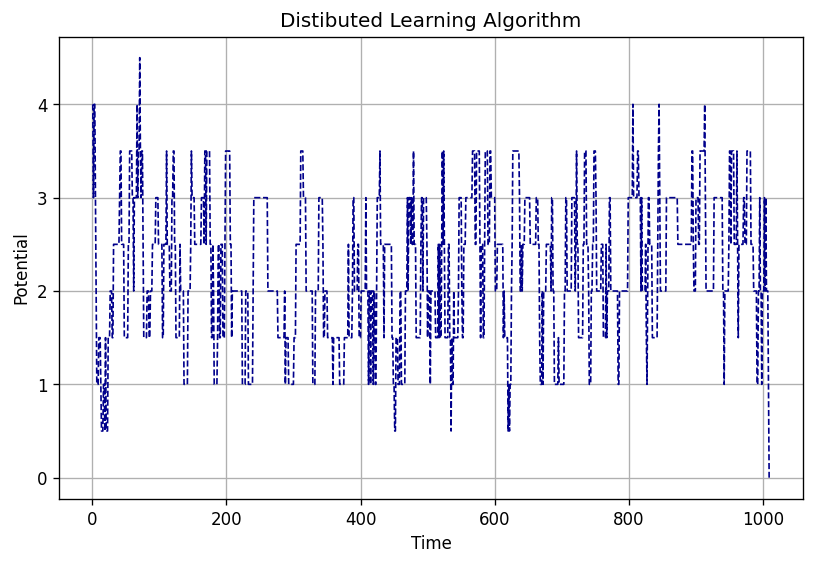

In [34]:
fig, ax = plt.subplots(figsize=(8,5), dpi=120)
ax.plot(time, value, color='darkblue', linestyle='dashed',linewidth=1, markersize=5)
ax.set_xlabel("Time")
ax.set_ylabel("Potential")
ax.grid()
ax.set_title("Distibuted Learning Algorithm")
plt.savefig("ex2_2.svg")
plt.show() 


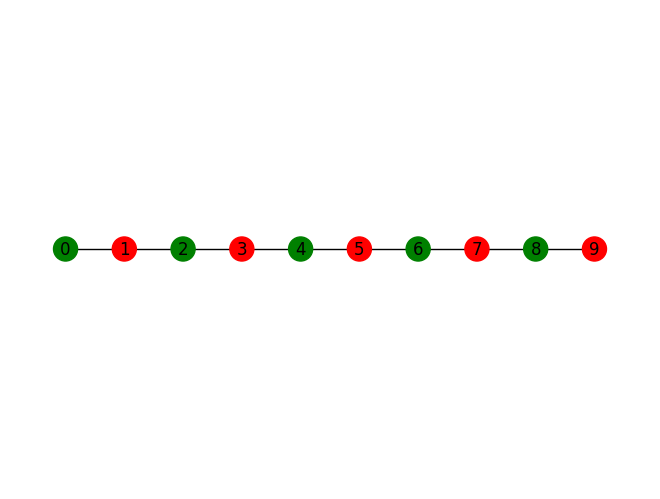

In [35]:
colors = ['red', 'green']
color_node = [colors[i]for i in node_state]
pos = {}
pos = {0: [0,0], 1: [1,0], 2: [2,0], 3: [3,0], 4: [4,0], 5: [5,0], 6: [6,0], 7: [7,0], 8: [8,0], 9: [9,0] }    
nx.draw(GC,pos, with_labels=True, node_color= color_node)
plt.savefig('ex2_3.svg')


2.b wifi proglem

In [36]:
W = np.loadtxt('wifi.mat')
pos = np.loadtxt('coords.mat')
pos = pos

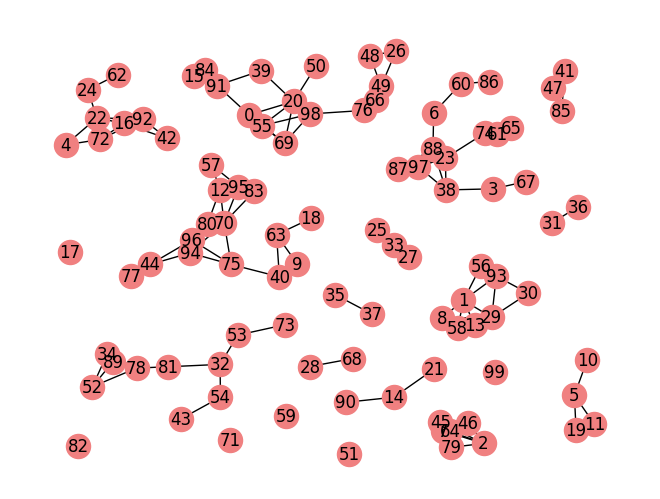

In [37]:
GC2 = nx.from_numpy_matrix(W)

nx.draw(GC2, pos= pos, with_labels = True, node_color = 'lightcoral')
plt.savefig("ex2_4.svg")


In [38]:
nodes = GC2.nodes
print(len(GC2.nodes))

100


In [39]:
n_nodes = 100

colors_names = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white', 'black']

possible_colors=[1,2,3,4,5,6,7,8]
n_states = 8
states = np.arange(n_states)
potentials = list()


for color in states:
    
    color_state = color*np.ones(100)
    
    
    t = 0
    potential_value = list()

    while t<1000:
        u=0

        for node in range(n_nodes):
            neighbors = list(GC2.neighbors(node))
            for n in neighbors:
                if color_state[node] == color_state[n]:
                    sum += 2
                elif abs(color_state[node]-color_state[n]) == 1:
                    sum +=1
        u = sum/2

        if u/2 < 6:
            potentials.append(u)
            print(f'color {colors[color]} done in {time} time')
            break

        random_node = np.random.randint(100) 
        
        neighbors = list(GC2.neighbors(random_node))
        

        numer = [0]*8
        probs = [0]*8
        

        for color in range(8):
            for n in neighbors:
                if color == color_state[n]:        
                    numer[color] += 2
                if np.abs(color-color_state[n]) == 1: 
                    numer[color] += 1
                    
        probab = [np.exp( -1 * (t/100) * numer[i]) for i in range(8)]

        denum = np.sum(probab)
        
        probab = probab/denum
        
        new_state = np.random.choice(8, p = probab)
        
        color_state[random_node] = new_state
        t += 1
                

       
        

In [40]:
print(color_state)

[2. 5. 7. 4. 7. 0. 0. 5. 2. 6. 2. 4. 0. 4. 5. 5. 7. 5. 7. 7. 6. 2. 3. 0.
 6. 4. 0. 7. 6. 0. 4. 0. 2. 1. 6. 0. 5. 7. 2. 2. 0. 3. 2. 4. 5. 0. 0. 0.
 7. 5. 0. 7. 0. 5. 0. 4. 1. 6. 7. 1. 3. 1. 2. 2. 4. 7. 3. 6. 4. 0. 7. 4.
 1. 3. 3. 5. 7. 3. 2. 2. 4. 7. 1. 5. 2. 7. 7. 2. 7. 4. 1. 0. 5. 7. 2. 3.
 0. 5. 2. 3.]


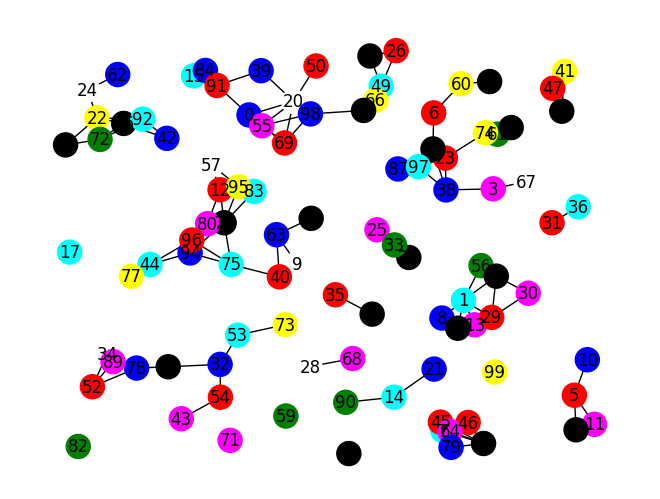

In [41]:

colors_names = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white', 'black']
color_config = [colors_names[i] for i in (color_state.astype(int))]
nx.draw(GC2, pos= pos, node_color = color_config ,with_labels = True)
plt.savefig("nodeswififinal.svg")
